## 생존여부 예측모델 만들기
### 학습용 데이터 (X_train, y_train)을 이용하여 생존 예측 모형을 만든 후, 이를 평가용 데이터(X_test)에 적용하여 얻은 예측값을 다음과 같은 형식의 CSV파일로 생성하시오(제출한 모델의 성능은 accuracy 평가지표에 따라 채점)

(가) 제공 데이터 목록
- y_train: 생존여부(학습용)
- X_trian, X_test : 승객 정보 (학습용 및 평가용)

(나) 데이터 형식 및 내용
- y_trian (712명 데이터)

**시험환경 세팅은 예시문제와 동일한 형태의 X_train, y_train, X_test 데이터를 만들기 위함임**

### 유의사항
- 성능이 우수한 예측모형을 구축하기 위해서는 적절한 데이터 전처리, 피처엔지니어링, 분류알고리즘, 하이퍼파라미터 튜닝, 모형 앙상블 등이 수반되어야 한다.
- 수험번호.csv파일이 만들어지도록 코드를 제출한다.
- 제출한 모델의 성능은 accuracy로 평가함

csv 출력형태

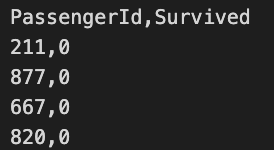

## [참고]작업형2 문구
- 출력을 원하실 경우 print() 함수 활용
- 예시) print(df.head())
- getcwd(), chdir() 등 작업 폴더 설정 불필요
- 파일 경로 상 내부 드라이브 경로(C: 등) 접근 불가

### 데이터 파일 읽기 예제
- import pandas as pd
- X_test = pd.read_csv("data/X_test.csv")
- X_train = pd.read_csv("data/X_train.csv")
- y_train = pd.read_csv("data/y_train.csv")

### 사용자 코딩

### 답안 제출 참고
- 아래 코드 예측변수와 수험번호를 개인별로 변경하여 활용
- pd.DataFrame({'cust_id': X_test.cust_id, 'gender': pred}).to_csv('003000000.csv', index=False)

In [3]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)
    
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])

    
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv("../input/titanic/train.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='Survived', id_name='PassengerId')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712, 2), (179, 2))

## Start

## 라이브러리 및 데이터 불러오기

In [4]:
# 라이브러리 불러오기
import pandas as pd

In [5]:
# 데이터 불러오기 (생략)
X_train.shape, y_train.shape, X_test.shape

((712, 11), (712, 2), (179, 11))

## EDA

In [6]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
90,91,3,"Christmann, Mr. Emil",male,29.0,0,0,343276,8.0500,NaN,S
103,104,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S
577,578,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.0,1,0,13507,55.9000,E44,S
215,216,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
191,192,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S


In [7]:
# float64(2), int64(3), object(5)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 90 to 116
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          575 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        170 non-null    object 
 10  Embarked     711 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


In [8]:
y_train.head()

,PassengerId,Survived
90,91,0
103,104,0
577,578,1
215,216,1
191,192,0


In [9]:
# 생존 비율
y_train['Survived'].value_counts()

0    441
1    271
Name: Survived, dtype: int64

In [10]:
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
210,211,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.0500,NaN,S
876,877,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
666,667,2,"Butler, Mr. Reginald Fenton",male,25.0,0,0,234686,13.0000,NaN,S
819,820,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9000,NaN,S
736,737,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S


In [11]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 210 to 45
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  179 non-null    int64  
 1   Pclass       179 non-null    int64  
 2   Name         179 non-null    object 
 3   Sex          179 non-null    object 
 4   Age          139 non-null    float64
 5   SibSp        179 non-null    int64  
 6   Parch        179 non-null    int64  
 7   Ticket       179 non-null    object 
 8   Fare         179 non-null    float64
 9   Cabin        34 non-null     object 
 10  Embarked     178 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 16.8+ KB


## 데이터 전처리

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

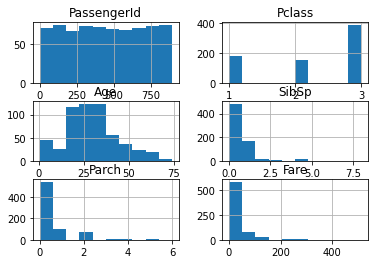

In [12]:
X_train.hist()

In [13]:
# num Null : Age
# obj Null : Cabin, Embarked

# 결측값 채우기
X_train['Age'] = X_train['Age'].fillna(X_train['Age'].mean())
X_test['Age'] = X_test['Age'].fillna(X_test['Age'].mean())

# X값 합치기
X_total = pd.concat([X_train, X_test])

In [14]:
# 최빈값으로 결측값 채우기
X_total['Cabin'].fillna(X_total['Cabin'].mode()[0], inplace=True)
X_total['Embarked'].fillna(X_total['Embarked'].mode()[0], inplace=True)

# Name
X_total = X_total.drop('Name', axis=1)

# 원핫인코딩 : 범주형 변수만 선택
features = X_total.select_dtypes('object').columns
features

X_total_encoded = pd.get_dummies(X_total, columns = features)

X_total_encoded.info()

# X_train, X_test 다시 분리하기
X_train = X_total_encoded.iloc[:len(X_train),:]
X_test = X_total_encoded.iloc[len(X_train):,:]

X_test

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 90 to 45
Columns: 839 entries, PassengerId to Embarked_S
dtypes: float64(2), int64(4), uint8(833)
memory usage: 773.5 KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Ticket_110152,Ticket_110413,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
210,211,3,24.000000,0,0,7.0500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
876,877,3,20.000000,0,0,9.8458,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
666,667,2,25.000000,0,0,13.0000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
819,820,3,10.000000,3,2,27.9000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
736,737,3,48.000000,1,3,34.3750,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,495,3,21.000000,0,0,8.0500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
871,872,1,47.000000,1,1,52.5542,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
530,531,2,2.000000,1,1,26.0000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
157,158,3,30.000000,0,0,8.0500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
y = y_train['Survived']

In [16]:
X_train.shape, X_test.shape

((712, 839), (179, 839))

## 모델 및 평가

In [17]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=2021)
model.fit(X_train, y)
predictions = model.predict(X_test)

In [18]:
model.score(X_train, y)

0.8342696629213483

In [19]:
output = pd.DataFrame({'PassengerId': X_test.PassengerId, 'Survived': predictions})
output.head()

,PassengerId,Survived
210,211,0
876,877,0
666,667,0
819,820,0
736,737,0


In [20]:
# 수험번호.csv로 출력
output.to_csv('1234567.csv', index=False)

<AxesSubplot:>

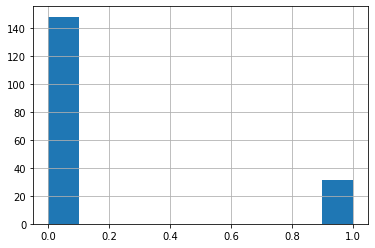

In [23]:
output['Survived'].hist()

## 결과 체점 (수험자는 알 수 없는 부분임)

In [21]:
model.score(test, y_test['Survived'])

NameError: name 'test' is not defined